In [2]:
import torch
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [[3], [7], [11], [15]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

import torch.nn as nn #biblioteca para podermos criar camadas 

class MyNeuralNet(nn.Module): #herda as funcionalidades
    def __init__(self): #construtor 
        super().__init__()
        self.layer1 = nn.Linear(2, 8)  #Camada linear, camada de dentrada
        self.activation = nn.ReLU()   #Função de ativação
        self.layer2 = nn.Linear(8, 1) #Camada de saída

    def forward(self, x): #define o fluxo de dados
        x = self.layer1(x) 
        x = self.activation(x)
        x = self.layer2(x)
        return x

model = MyNeuralNet()
model.to(device)


MyNeuralNet(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (activation): ReLU()
  (layer2): Linear(in_features=8, out_features=1, bias=True)
)

In [4]:
loss_func = nn.MSELoss()

In [5]:
opt = SGD(model.parameters(), lr=0.001)

In [9]:
losses = []
for _ in range(50):  #50 epochs 
        opt.zero_grad() #zerando gradiente    
        
        loss_value = loss_func(model(X), Y) #Valor de erro
        
        loss_value.backward() 

        opt.step() #Atualizando os pesos
        
        losses.append(loss_value.detach().cpu().numpy()) #Somando valor do erro

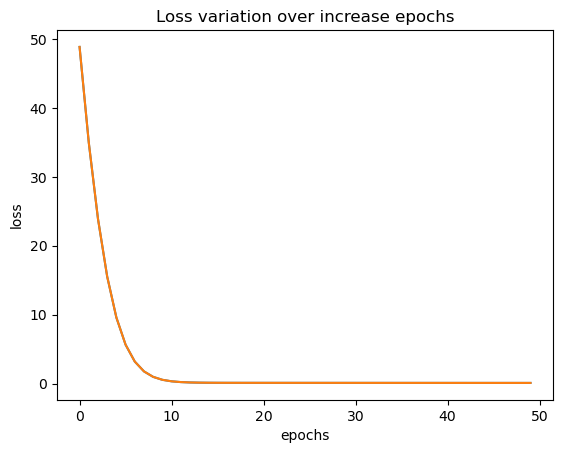

In [11]:
plt.plot(losses)
plt.title("Loss variation over increase epochs")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()